In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [3]:
train.head(3)

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,dcf68cc2fb515ccad7d8b9b3bd80ee2a4b270063,SAINT-LOUIS,K > 24 month,17000.0,32.0,18000.0,6000.0,34.0,NaN,97.0,355.0,6.0,NaN,NaN,NO,62,All-net 500F=2000F;5d,35.0,0
1,71c44b5ba328db5c4192a80f7cf8f244d9350ed0,NaN,K > 24 month,4300.0,29.0,4427.0,1476.0,37.0,1764.0,8.0,3.0,0.0,NaN,2.0,NO,40,"Data: 100 F=40MB,24H",22.0,0
2,ce46411b1526c94f20a383b8cb188f8d27f82a0a,TAMBACOUNDA,K > 24 month,1500.0,3.0,1500.0,500.0,3.0,NaN,30.0,30.0,NaN,NaN,NaN,NO,32,All-net 500F=2000F;5d,3.0,0


In [4]:
train.columns

Index(['user_id', 'REGION', 'TENURE', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE',
       'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO',
       'ZONE1', 'ZONE2', 'MRG', 'REGULARITY', 'TOP_PACK', 'FREQ_TOP_PACK',
       'CHURN'],
      dtype='object')

In [5]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         400000 non-null  object 
 1   REGION          242480 non-null  object 
 2   TENURE          400000 non-null  object 
 3   MONTANT         259723 non-null  float64
 4   FREQUENCE_RECH  259723 non-null  float64
 5   REVENUE         265337 non-null  float64
 6   ARPU_SEGMENT    265337 non-null  float64
 7   FREQUENCE       265337 non-null  float64
 8   DATA_VOLUME     203146 non-null  float64
 9   ON_NET          254181 non-null  float64
 10  ORANGE          233683 non-null  float64
 11  TIGO            160614 non-null  float64
 12  ZONE1           31690 non-null   float64
 13  ZONE2           25513 non-null   float64
 14  MRG             400000 non-null  object 
 15  REGULARITY      400000 non-null  int64  
 16  TOP_PACK        232671 non-null  object 
 17  FREQ_TOP_P

In [6]:
train.isnull().sum()

user_id                0
REGION            157520
TENURE                 0
MONTANT           140277
FREQUENCE_RECH    140277
REVENUE           134663
ARPU_SEGMENT      134663
FREQUENCE         134663
DATA_VOLUME       196854
ON_NET            145819
ORANGE            166317
TIGO              239386
ZONE1             368310
ZONE2             374487
MRG                    0
REGULARITY             0
TOP_PACK          167329
FREQ_TOP_PACK     167329
CHURN                  0
dtype: int64

In [7]:
train['MRG'] = train['MRG'].factorize()[0]
train['TENURE'] = train['TENURE'].factorize()[0]
test['MRG'] = test['MRG'].factorize()[0]
test['TENURE'] = test['TENURE'].factorize()[0]

In [8]:
train = train.drop('TOP_PACK', axis=1)
test = test.drop('TOP_PACK', axis=1)

In [9]:
to_drop = [columns for columns in train.columns[train.isnull().mean()>=0.7]]
to_drop.extend([columns for columns in train.columns if columns not in ['user_id', 'REGION']
                if train[columns].std() == 0])
to_drop.append('user_id')
train.drop(to_drop, axis=1, inplace=True)
test.drop(to_drop, axis=1, inplace=True)
print("%f columns were dropped"%(len(to_drop)))

4.000000 columns were dropped


In [10]:
train = train.fillna(method='bfill')
test = test.fillna(method='bfill')

In [11]:
print(train['REGION'].value_counts())

DAKAR          157923
THIES           54719
SAINT-LOUIS     36744
LOUGA           30431
KAOLACK         29874
DIOURBEL        20575
TAMBACOUNDA     16966
KAFFRINE        13421
KOLDA           11928
FATICK          10945
MATAM            8640
ZIGUINCHOR       6584
SEDHIOU           941
KEDOUGOU          305
Name: REGION, dtype: int64


In [12]:
label = train['REGION'].astype('category').cat.categories.tolist()
replace = {'REGION' : {k: v for k,v in zip(label,list(range(1,len(label)+1)))}}
print(replace)
train.replace(replace, inplace=True) 

{'REGION': {'DAKAR': 1, 'DIOURBEL': 2, 'FATICK': 3, 'KAFFRINE': 4, 'KAOLACK': 5, 'KEDOUGOU': 6, 'KOLDA': 7, 'LOUGA': 8, 'MATAM': 9, 'SAINT-LOUIS': 10, 'SEDHIOU': 11, 'TAMBACOUNDA': 12, 'THIES': 13, 'ZIGUINCHOR': 14}}


In [13]:
label = test['REGION'].astype('category').cat.categories.tolist()
replace = {'REGION' : {k: v for k,v in zip(label,list(range(1,len(label)+1)))}}
print(replace)
test.replace(replace, inplace=True)

{'REGION': {'DAKAR': 1, 'DIOURBEL': 2, 'FATICK': 3, 'KAFFRINE': 4, 'KAOLACK': 5, 'KEDOUGOU': 6, 'KOLDA': 7, 'LOUGA': 8, 'MATAM': 9, 'SAINT-LOUIS': 10, 'SEDHIOU': 11, 'TAMBACOUNDA': 12, 'THIES': 13, 'ZIGUINCHOR': 14}}


In [15]:
#filling the remaining missing data
for col in train.columns:
    train[col].fillna(train[col].mean(),inplace= True)
for col in test.columns:
    test[col].fillna(test[col].mean(),inplace= True)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_trans = sc.fit_transform(train.drop(['CHURN'], axis = 1))
test_trans = sc.transform(test)

In [17]:
X = train_trans
y= train['CHURN']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(280000, 13)
(120000, 13)
(280000,)
(120000,)


In [19]:
def loss(true, pred):
    from sklearn.metrics import log_loss
    return np.sqrt(log_loss(true, pred))

In [21]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000, min_samples_split=15, min_samples_leaf=15, max_features='auto', max_depth=11)
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_test)
loss(y_test, y_pred)

0.5576965360299676

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
gbr =GradientBoostingClassifier()
gbr.fit(X_train, y_train)
y_pred = gbr.predict_proba(X_test)
loss(y_test, y_pred)

0.5539458680910758

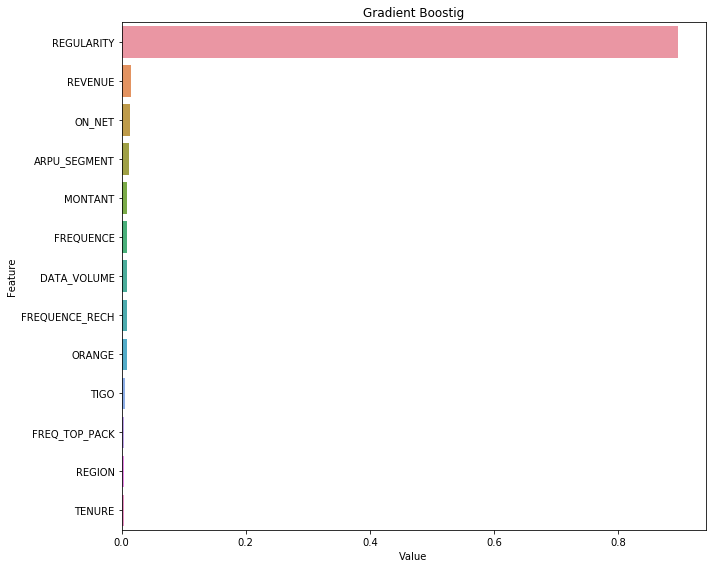

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
feature_imp = pd.DataFrame(sorted(zip(rf.feature_importances_,train.columns)), columns=['Value','Feature'])

plt.figure(figsize=(10,8))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Gradient Boostig')
plt.tight_layout()
plt.show()

In [27]:
from sklearn.ensemble import AdaBoostClassifier

In [31]:
ada =AdaBoostClassifier()
ada.fit(X_train, y_train)
y_pred = ada.predict_proba(X_test)
loss(y_test, y_pred)

0.8175096457886906